In [1]:
#Importing all the library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
### reading data set
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
### scaling x train
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(x)
df_X_train_scaled = pd.DataFrame(X_train_scaled)

In [4]:
x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_test_scaled = min_max_scaler.fit_transform(x)
df_X_test_scaled = pd.DataFrame(X_test_scaled)

# implementing KNN

In [6]:
X, Y = [], []

y_train_np = np.array(y_train)
y_train_np = y_train_np.flatten()
y_test_np = np.array(y_test)
y_test_np = y_test_np.flatten()

max_accu, val_at_max_acc = 0, -1
## testing for every value of k which gives the best result

for i in range(3, 105,  2):
    print(i)
    clf_KNN = KNeighborsClassifier(n_neighbors=i)

    # Fit the classifier to the training data
    clf_KNN.fit(X_train, y_train_np)

    # Evaluate the classifier on the test data
    accuracy_KNN = clf_KNN.score(X_test, y_test_np)
    
    if accuracy_KNN > max_accu:
        max_accu = accuracy_KNN
        val_at_max_acc = i
    
    X.append(i)
    Y.append(accuracy_KNN)

3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103


0.7577639751552795
3


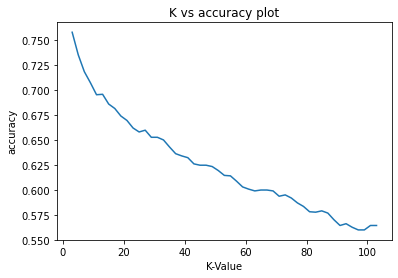

In [7]:
plt.plot(X, Y)
plt.xlabel('K-Value')
plt.ylabel('accuracy')
plt.title('K vs accuracy plot')


print(max_accu)
print(val_at_max_acc)

In [10]:
# implementing the model with best value of k
y_train_np = np.array(y_train)
y_train_np = y_train_np.flatten()
y_test_np = np.array(y_test)
y_test_np = y_test_np.flatten()
clf_KNN = KNeighborsClassifier(n_neighbors=3)

    # Fit the classifier to the training data
clf_KNN.fit(df_X_train_scaled, y_train_np)

    # Evaluate the classifier on the test data
accuracy_KNN = clf_KNN.score(df_X_test_scaled, y_test_np)

In [12]:
y_pred = clf_KNN.predict(df_X_test_scaled)

In [13]:
print("Classification report for KNN: \n",classification_report(y_test, y_pred))

Classification report for KNN: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1127
           1       0.78      0.88      0.83      1127

    accuracy                           0.81      2254
   macro avg       0.82      0.81      0.81      2254
weighted avg       0.82      0.81      0.81      2254

